<a href="https://colab.research.google.com/github/JerKeller/2022_Intro_Python/blob/main/DVM_mai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import sys
import subprocess
from plotnine import ggplot, aes, geom_point, geom_line, labs, ggtitle, scale_y_log10
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DVM_april = '/content/drive/MyDrive/Ecotaxa_analysis/dvm_mai.tsv'
tsv_read = pd.read_csv(DVM_april, sep='\t')


In [6]:
sub1 = tsv_read[['object_id','object_date','object_time', 'object_depth_min', 'object_depth_max', 'object_annotation_category',
                 'object_area', 'object_area_exc', 'object_major', 'object_minor', 'sample_tot_vol', 'process_particle_pixel_size_mm',
                 'acq_id']]

In [7]:
sub1.columns = ['Label', 'Date', 'Hour', 'Min_depth', 'Max_depth', 'Taxa', 'area', 'areaExc', 'major', 'minor',
                'Tow_Vol', 'pixel_size_mm', 'acq_id']

In [8]:
sub2 = sub1[(sub1['Taxa'] != 'badfocus<artefact') & (sub1['Taxa'] != 'fiber<detritus') &
            (sub1['Taxa'] != 'multiple<other') & (sub1['Taxa'] != 'detritus') &
            (sub1['Taxa'] != 'egg sac<egg') & (sub1['Taxa'] != 't001') &
            (sub1['Taxa'] != 't002') & (sub1['Taxa'] != 't003') &
            (sub1['Taxa'] != 'othertocheck') & (sub1['Taxa'] != 'artefact') &
            (sub1['Taxa'] != 'bubble') & (sub1['Taxa'] != 'dead<Copepoda')].copy()

In [9]:
print(sub2)

              Label      Date    Hour  Min_depth  Max_depth  \
0         1_tot_1_2  20230523  154500        0.0      100.0   
1         1_tot_1_3  20230523  154500        0.0      100.0   
3         1_tot_1_5  20230523  154500        0.0      100.0   
5        1_tot_1_12  20230523  154500        0.0      100.0   
6        1_tot_1_16  20230523  154500        0.0      100.0   
...             ...       ...     ...        ...        ...   
20632  9_tot_1_2019  20230523  201000        0.0      100.0   
20633  9_tot_1_2020  20230523  201000        0.0      100.0   
20635  9_tot_1_2022  20230523  201000        0.0      100.0   
20636  9_tot_1_2024  20230523  201000        0.0      100.0   
20637  9_tot_1_2025  20230523  201000        0.0      100.0   

                       Taxa    area  areaExc  major  minor  Tow_Vol  \
0          nauplii<Copepoda  1087.0   1085.0   43.1   32.1   7.0686   
1        Cyclops prealpinus  2991.0   2990.0   86.9   43.8   7.0686   
3      Eudiaptomus gracilis  3

In [10]:
substrat = sub2[~sub2['acq_id'].isin(['tot_1','tot_8','tot_9','tot_16','tot_17','tot_18','tot_19','tot_20','tot_21','tot_22',
                                      'tot_29','tot_30','tot_37'])].copy()

Pixel to mm

In [11]:
substrat['Area_mm2'] = substrat['area'] * ((substrat['pixel_size_mm']) ** 2)
substrat['AreaExc_mm2'] = substrat['areaExc'] * ((substrat['pixel_size_mm']) ** 2)
substrat['Major_mm'] = substrat['major'] * substrat['pixel_size_mm']
substrat['Minor_mm'] = substrat['minor'] * substrat['pixel_size_mm']

In [12]:
substrat['Date'] = pd.to_datetime(substrat['Date'], format='%Y%m%d')

Ellipsoidal Volume = V (mm3) = 4/3 x ∏ x [ (Major(mm)/2) x (Minor(mm)/2) x (Minor(mm)/2) ]

In [13]:
substrat['V_mm3'] = (4 / 3) * np.pi * ((substrat['Major_mm'] / 2) * (substrat['Minor_mm'] / 2) * (substrat['Minor_mm'] / 2))

In [ ]:
print(substrat)

              Label       Date    Hour  Min_depth  Max_depth  \
1243    10_tot_1_10 2023-05-23  203000       80.0      100.0   
1256    10_tot_1_27 2023-05-23  203000       80.0      100.0   
1292    10_tot_1_80 2023-05-23  203000       80.0      100.0   
1308   10_tot_1_119 2023-05-23  203000       80.0      100.0   
1313   10_tot_1_127 2023-05-23  203000       80.0      100.0   
...             ...        ...     ...        ...        ...   
19514   7_tot_1_403 2023-05-23  172700        0.0       10.0   
19515   7_tot_1_410 2023-05-23  172700        0.0       10.0   
19520   7_tot_1_424 2023-05-23  172700        0.0       10.0   
19527   7_tot_1_444 2023-05-23  172700        0.0       10.0   
19529   7_tot_1_446 2023-05-23  172700        0.0       10.0   

                       Taxa     area  areaExc  major  minor  Tow_Vol  \
1243   Eudiaptomus gracilis   3590.0   3589.0   72.8   62.8  1.41370   
1256   Eudiaptomus gracilis   2747.0   2744.0   64.8   54.0  1.41370   
1292   Eudiapto

In [14]:
tot_2 = substrat[substrat['acq_id'] == 'tot_2']
tot_3 = substrat[substrat['acq_id'] == 'tot_3']
tot_4 = substrat[substrat['acq_id'] == 'tot_4']
tot_5 = substrat[substrat['acq_id'] == 'tot_5']
tot_6 = substrat[substrat['acq_id'] == 'tot_6']
tot_7 = substrat[substrat['acq_id'] == 'tot_7']

tot_10 = substrat[substrat['acq_id'] == 'tot_10']
tot_11 = substrat[substrat['acq_id'] == 'tot_11']
tot_12 = substrat[substrat['acq_id'] == 'tot_12']
tot_13 = substrat[substrat['acq_id'] == 'tot_13']
tot_14 = substrat[substrat['acq_id'] == 'tot_14']
tot_15 = substrat[substrat['acq_id'] == 'tot_15']

tot_23 = substrat[substrat['acq_id'] == 'tot_23']
tot_24 = substrat[substrat['acq_id'] == 'tot_24']
tot_25 = substrat[substrat['acq_id'] == 'tot_25']
tot_26 = substrat[substrat['acq_id'] == 'tot_26']
tot_27 = substrat[substrat['acq_id'] == 'tot_27']
tot_28 = substrat[substrat['acq_id'] == 'tot_28']

tot_31 = substrat[substrat['acq_id'] == 'tot_31']
tot_32 = substrat[substrat['acq_id'] == 'tot_32']
tot_33 = substrat[substrat['acq_id'] == 'tot_33']
tot_34 = substrat[substrat['acq_id'] == 'tot_34']
tot_35 = substrat[substrat['acq_id'] == 'tot_35']
tot_36 = substrat[substrat['acq_id'] == 'tot_36']

tot_38 = substrat[substrat['acq_id'] == 'tot_38']
tot_39 = substrat[substrat['acq_id'] == 'tot_39']
tot_40 = substrat[substrat['acq_id'] == 'tot_40']
tot_41 = substrat[substrat['acq_id'] == 'tot_41']
tot_42 = substrat[substrat['acq_id'] == 'tot_42']
tot_43 = substrat[substrat['acq_id'] == 'tot_43']

In [15]:
profile_1 = pd.concat([tot_2, tot_3, tot_4, tot_5, tot_6, tot_7], ignore_index=True)
profile_2 = pd.concat([tot_10, tot_11, tot_12, tot_13, tot_14, tot_15], ignore_index=True)
profile_3 = pd.concat([tot_23, tot_24, tot_25, tot_26, tot_27, tot_28], ignore_index=True)
profile_4 = pd.concat([tot_31, tot_32, tot_33, tot_34, tot_35, tot_36], ignore_index=True)
profile_5 = pd.concat([tot_38, tot_39, tot_40, tot_41, tot_42, tot_43], ignore_index=True)

In [16]:
# Pour le profil 1
profile_1_count = profile_1.groupby('Taxa').size().reset_index(name='Count')
print("Nombre d'individus par espèce pour le profil 1:")
print(profile_1_count)

# Pour le profil 2
profile_2_count = profile_2.groupby('Taxa').size().reset_index(name='Count')
print("\nNombre d'individus par espèce pour le profil 2:")
print(profile_2_count)

Nombre d'individus par espèce pour le profil 1:
                   Taxa  Count
0    Cyclops prealpinus    159
1    Daphnia<Daphniidae      9
2  Eudiaptomus gracilis    204
3     Leptodora kindtii     10
4      nauplii<Copepoda     81

Nombre d'individus par espèce pour le profil 2:
                      Taxa  Count
0  Bythotrephes longimanus      6
1       Cyclops prealpinus    252
2       Daphnia<Daphniidae     19
3     Eudiaptomus gracilis    249
4        Leptodora kindtii      2
5         nauplii<Copepoda     67


In [17]:
profiles = [profile_1, profile_2, profile_3, profile_4, profile_5]

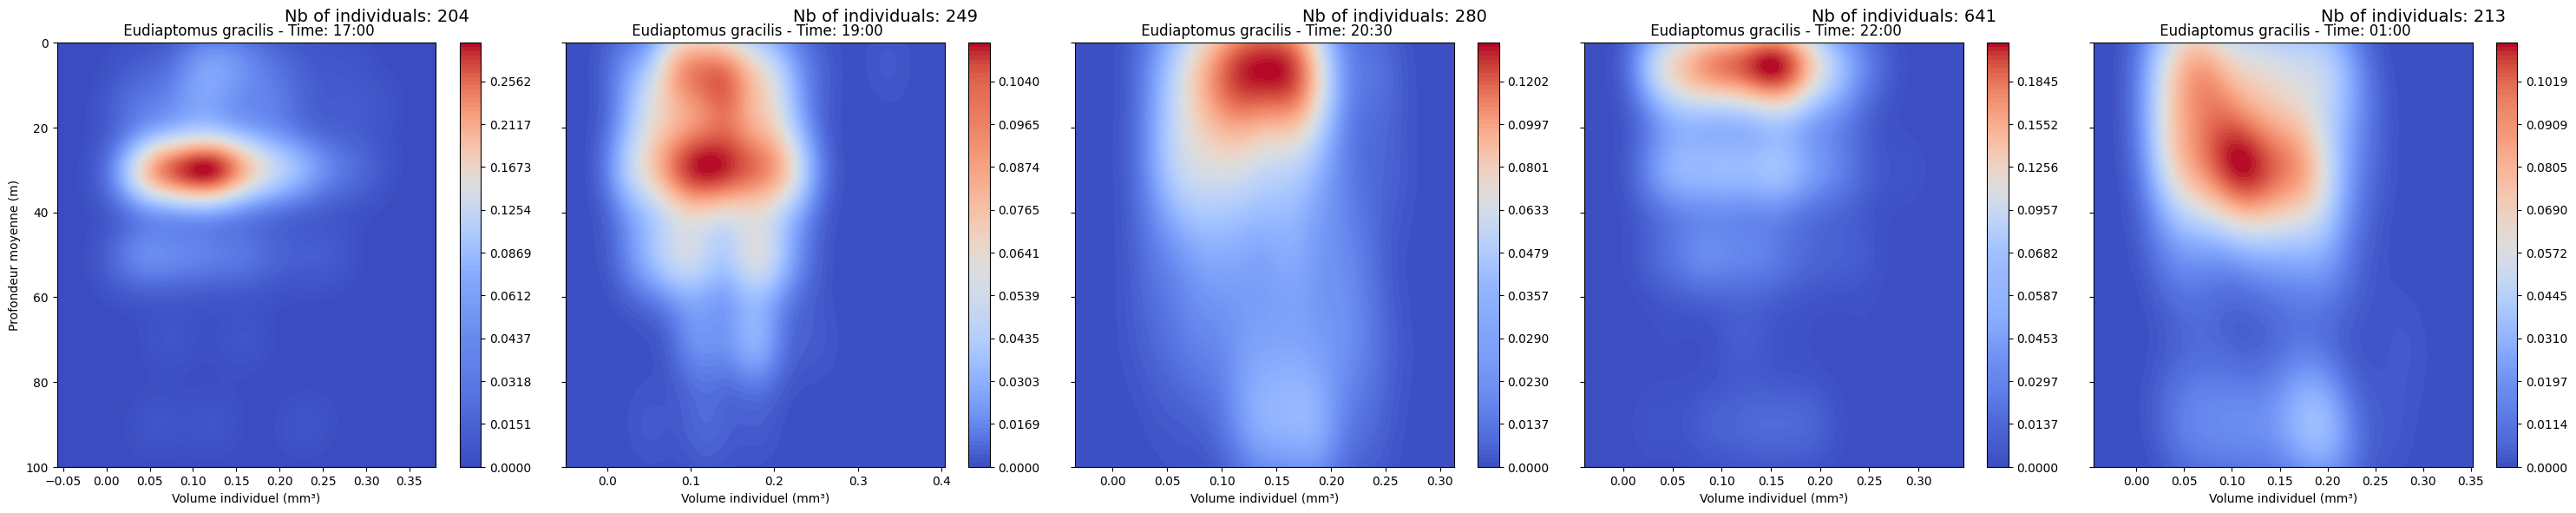

In [18]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Eudiaptomus gracilis'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['V_mm3'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()

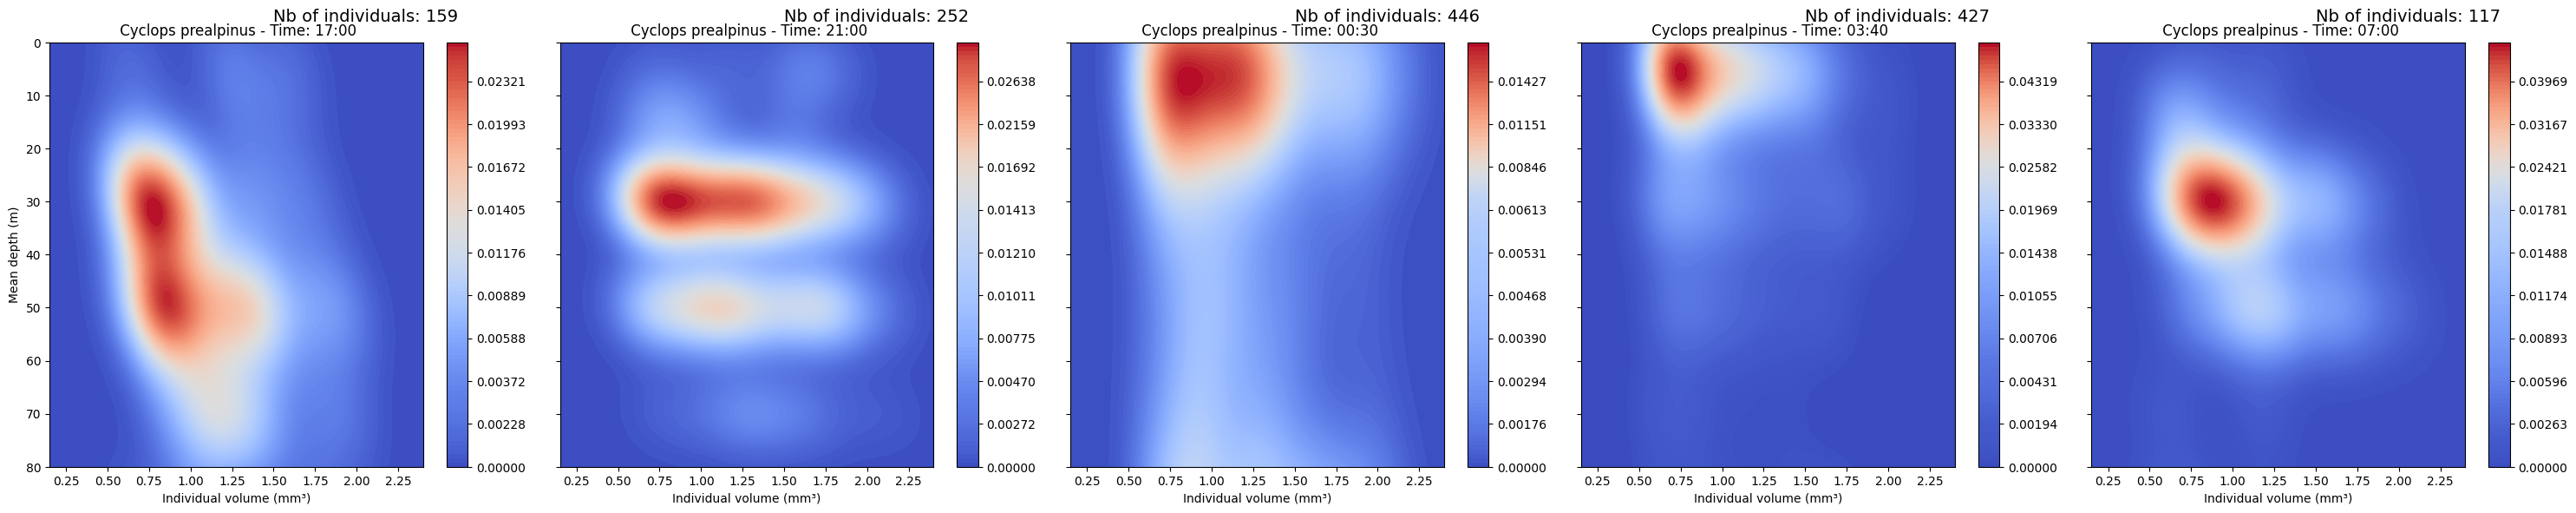

In [19]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '21:00', '00:30', '03:40', '07:00']

# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
sp = 'Cyclops prealpinus'
species_data_all_profiles = [profile[profile['Taxa'] == sp] for profile in profiles]

# Créez les sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()
for idx, (hour, species_data) in enumerate(zip(hours, species_data_all_profiles)):
    species_data = species_data.copy()  # Ajoutez cette ligne pour créer une copie
    species_data['Avg_depth'] = (species_data['Min_depth'] + species_data['Max_depth']) / 2
    species_data = species_data[(species_data['Avg_depth'] >= 0) & (species_data['Avg_depth'] <= 100)]


    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=species_data['Major_mm'], y=species_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(species_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f' {sp} - Time: {hour}')
    axes[idx].set_xlabel('Individual volume (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(80, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m
    axes[idx].set_xlim(0.15, 2.4)

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Mean depth (m)')
plt.tight_layout()
plt.show()

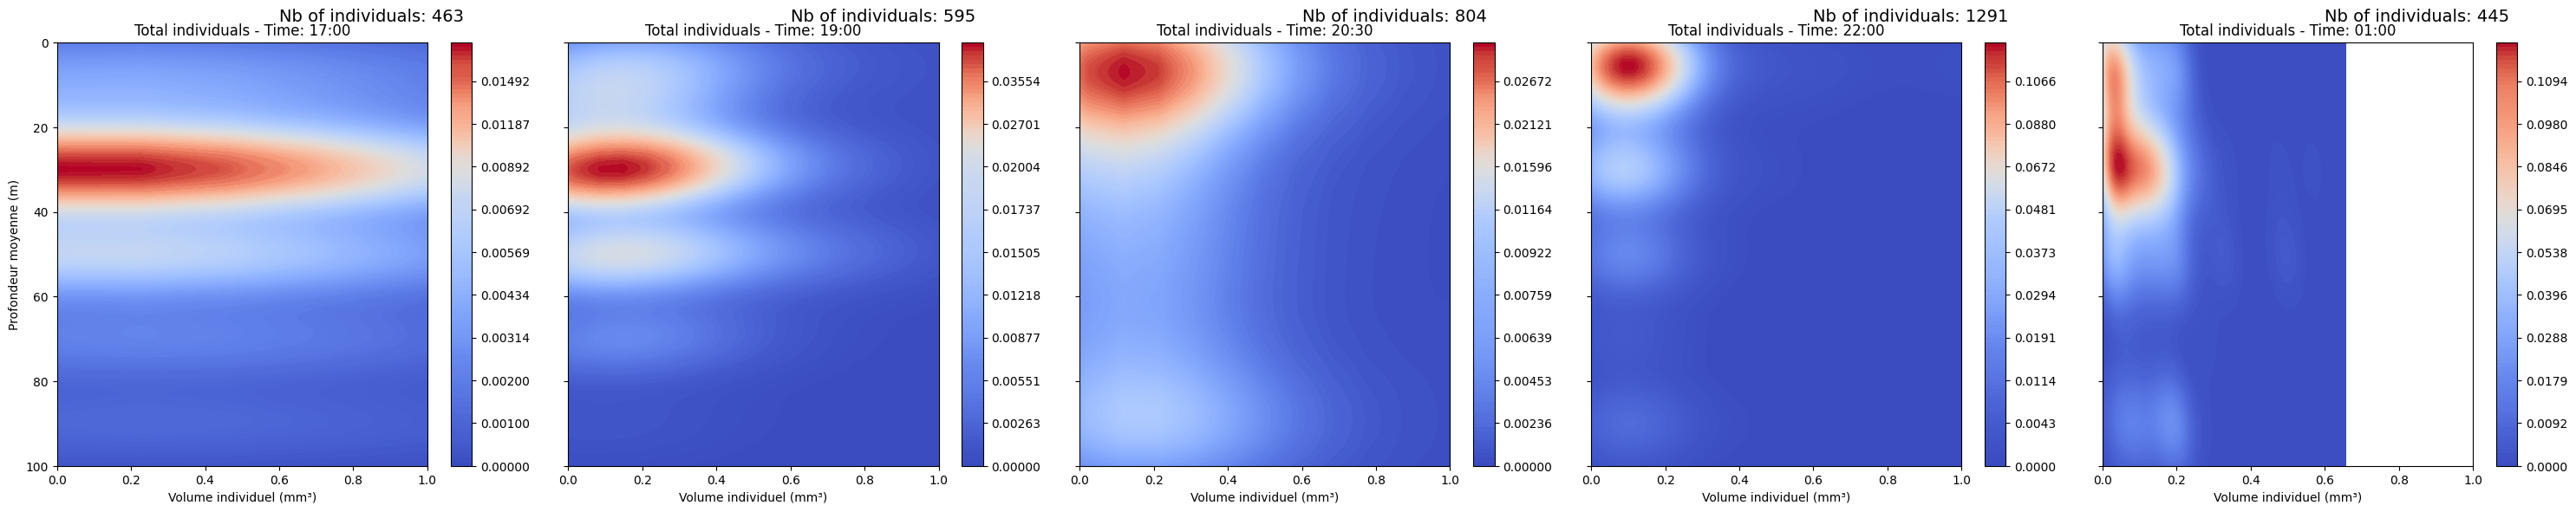

In [ ]:
# Ajoutez vos heures pour chaque profil dans l'ordre
hours = ['17:00', '19:00', '20:30', '22:00', '01:00']

# Utilisez les données de tous les profils sans filtrer par espèce
all_data_profiles = profiles

# Créez les sous-graphiques
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()
for idx, (hour, profile_data) in enumerate(zip(hours, all_data_profiles)):
    profile_data = profile_data.copy()  # Créez une copie
    profile_data['Avg_depth'] = (profile_data['Min_depth'] + profile_data['Max_depth']) / 2
    profile_data = profile_data[(profile_data['Avg_depth'] >= 0) & (profile_data['Avg_depth'] <= 100)]

    # Tracez le KDE 2D avec une barre de couleur sur le sous-tracé approprié
    sns.kdeplot(x=profile_data['V_mm3'], y=profile_data['Avg_depth'], fill=True, cmap='coolwarm', thresh=0, levels=100, cbar=True, ax=axes[idx])

    # Ajoutez le nombre total d'individus dans le graphique
    num_individuals = len(profile_data)
    axes[idx].text(0.6, 1.05, f'Nb of individuals: {num_individuals}', transform=axes[idx].transAxes, fontsize=14)

    axes[idx].set_title(f'Total individuals - Time: {hour}')
    axes[idx].set_xlabel('Volume individuel (mm³)')
    axes[idx].invert_yaxis()  # Inverser l'axe des y pour montrer la profondeur de haut en bas
    axes[idx].set_ylim(100, 0)  # Définir les limites de l'axe des y pour montrer uniquement les profondeurs entre 0 et 100m
    axes[idx].set_xlim(0, 1)

# Définir le libellé de l'axe des y partagé
axes[0].set_ylabel('Profondeur moyenne (m)')
plt.tight_layout()
plt.show()


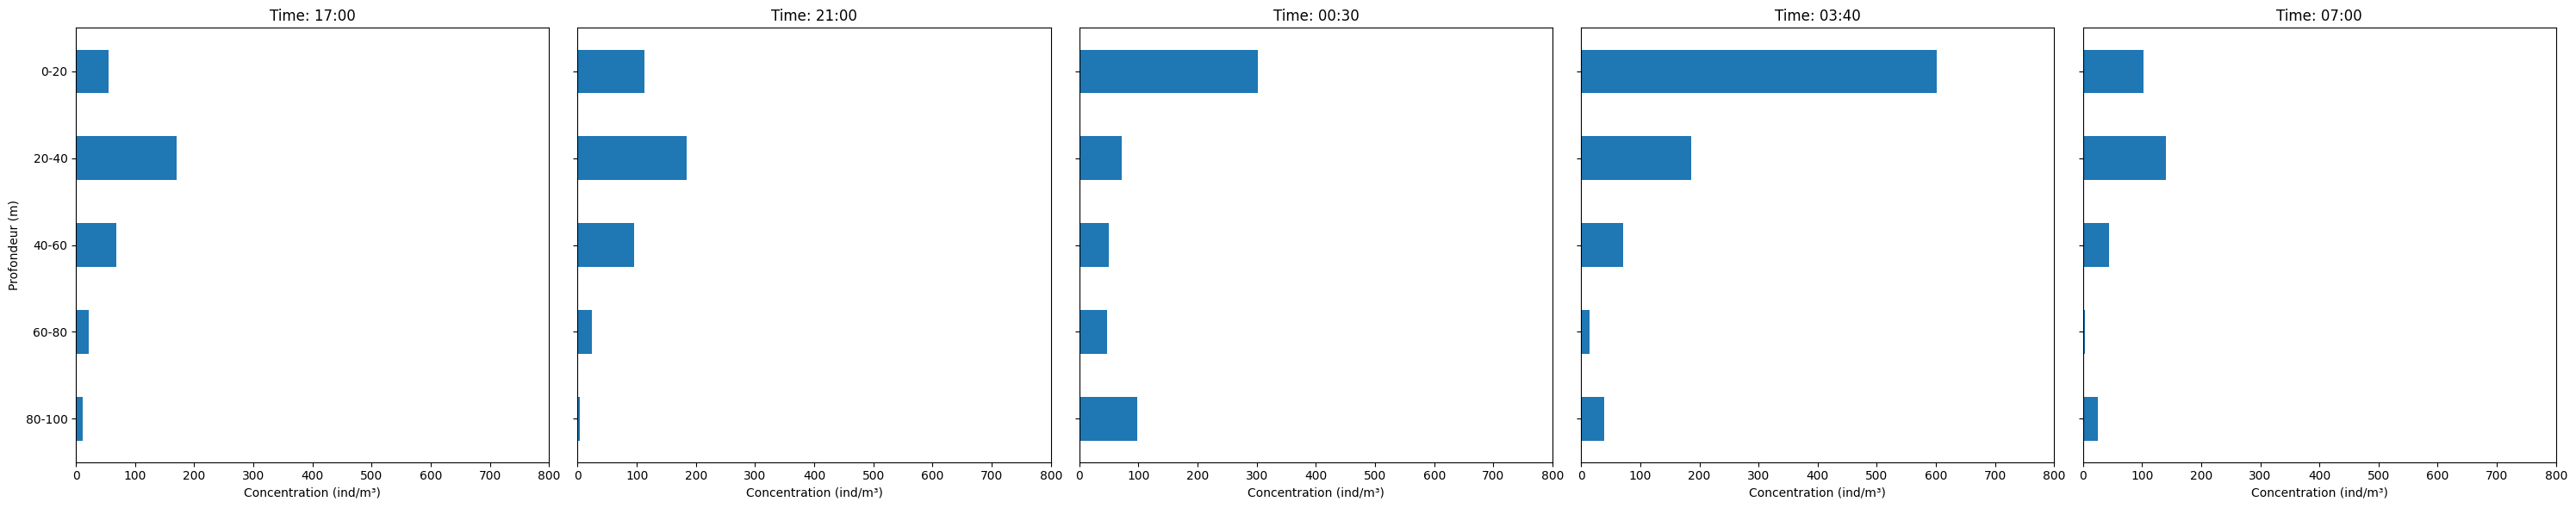

In [20]:
# Calculez la concentration d'individus par m³ pour chaque tranche de profondeur
def calculate_concentration(profile):
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 800)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()



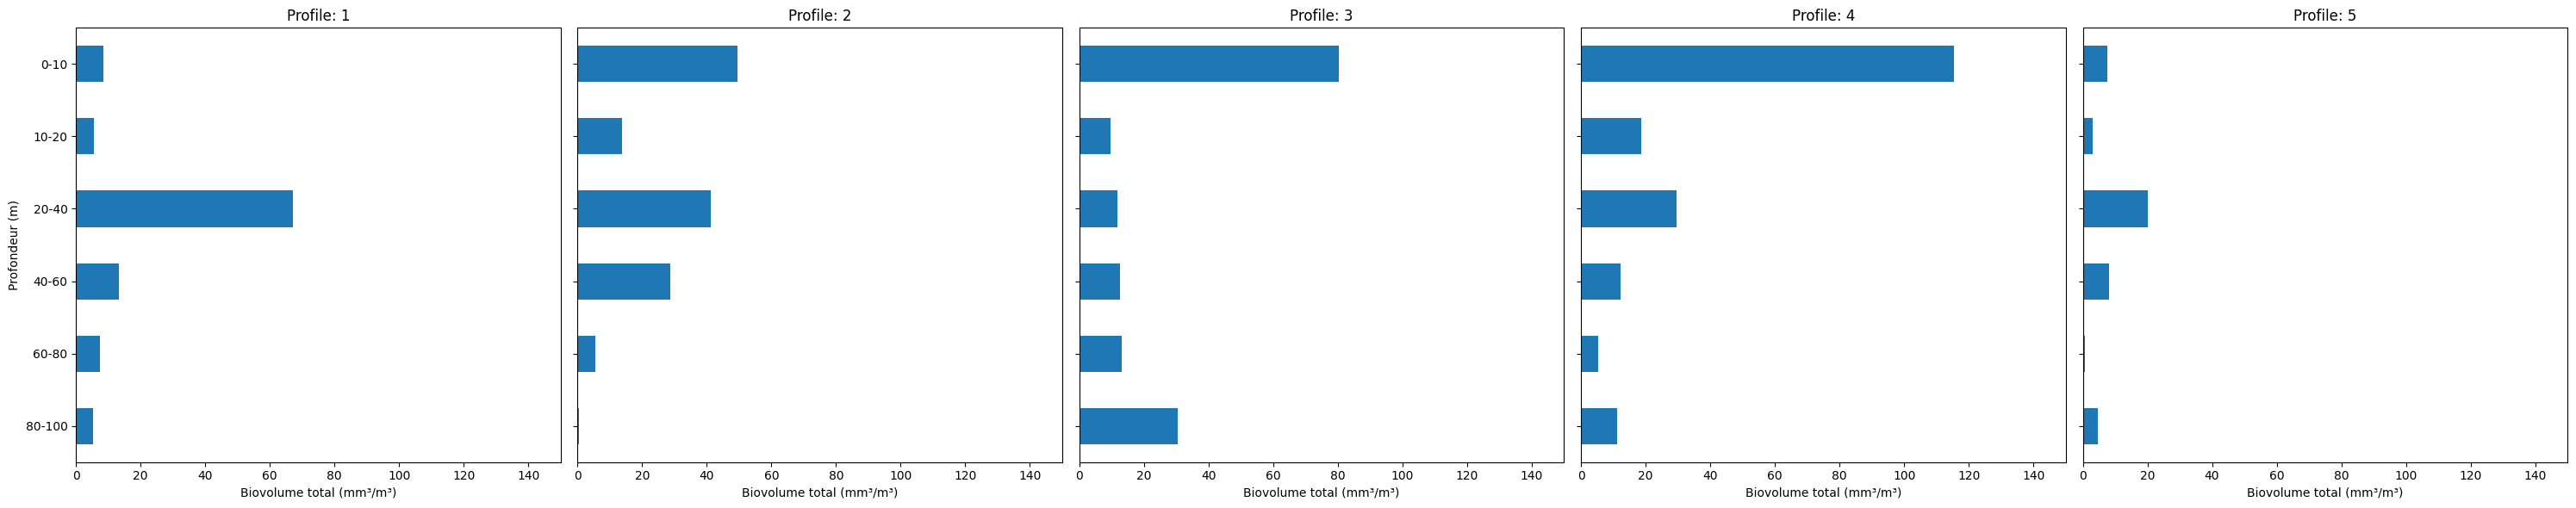

In [29]:
# Calculez le biovolume total par m³ pour chaque tranche de profondeur
def calculate_total_biovolume(profile):
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=[0, 10, 20, 40, 60, 80, 100], right=False)
    total_biovolume = profile.groupby('Depth_group')['V_mm3'].sum()
    return total_biovolume

total_biovolumes = [calculate_total_biovolume(profile) for profile in profiles]

# Créez des bar plots horizontaux pour afficher ces biovolumes en fonction de la profondeur
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()

for idx, (hour, total_biovolume) in enumerate(zip(hours, total_biovolumes)):
    ax = axes[idx]
    total_biovolume.plot(kind='barh', ax=ax)
    ax.set_title(f'Profile: {idx+1}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in total_biovolume.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Biovolume total (mm³/m³)')
    ax.set_ylim(-0.5, 5.5)
    ax.set_xlim(0, 150)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()




NameError: ignored

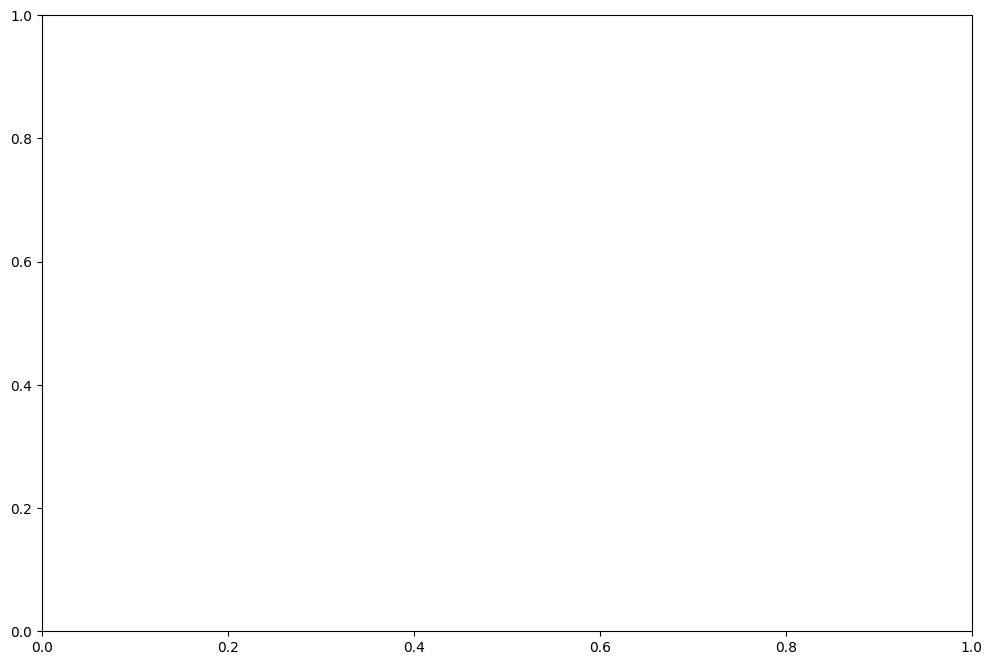

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', hue='Avg_depth', data=all_data_profiles, ax=ax)


In [1]:
import matplotlib.pyplot as plt

# Filtrez les données pour ne garder que l'espèce Cyclops prealpinus
species = 'Cyclops prealpinus'
filtered_profiles = [profile[profile['Taxa'] == species] for profile in profiles]

def calculate_concentration(profile):
    profile = profile.copy()  # Créer une copie pour éviter l'avertissement
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in filtered_profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'{species} - Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 400)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


NameError: ignored

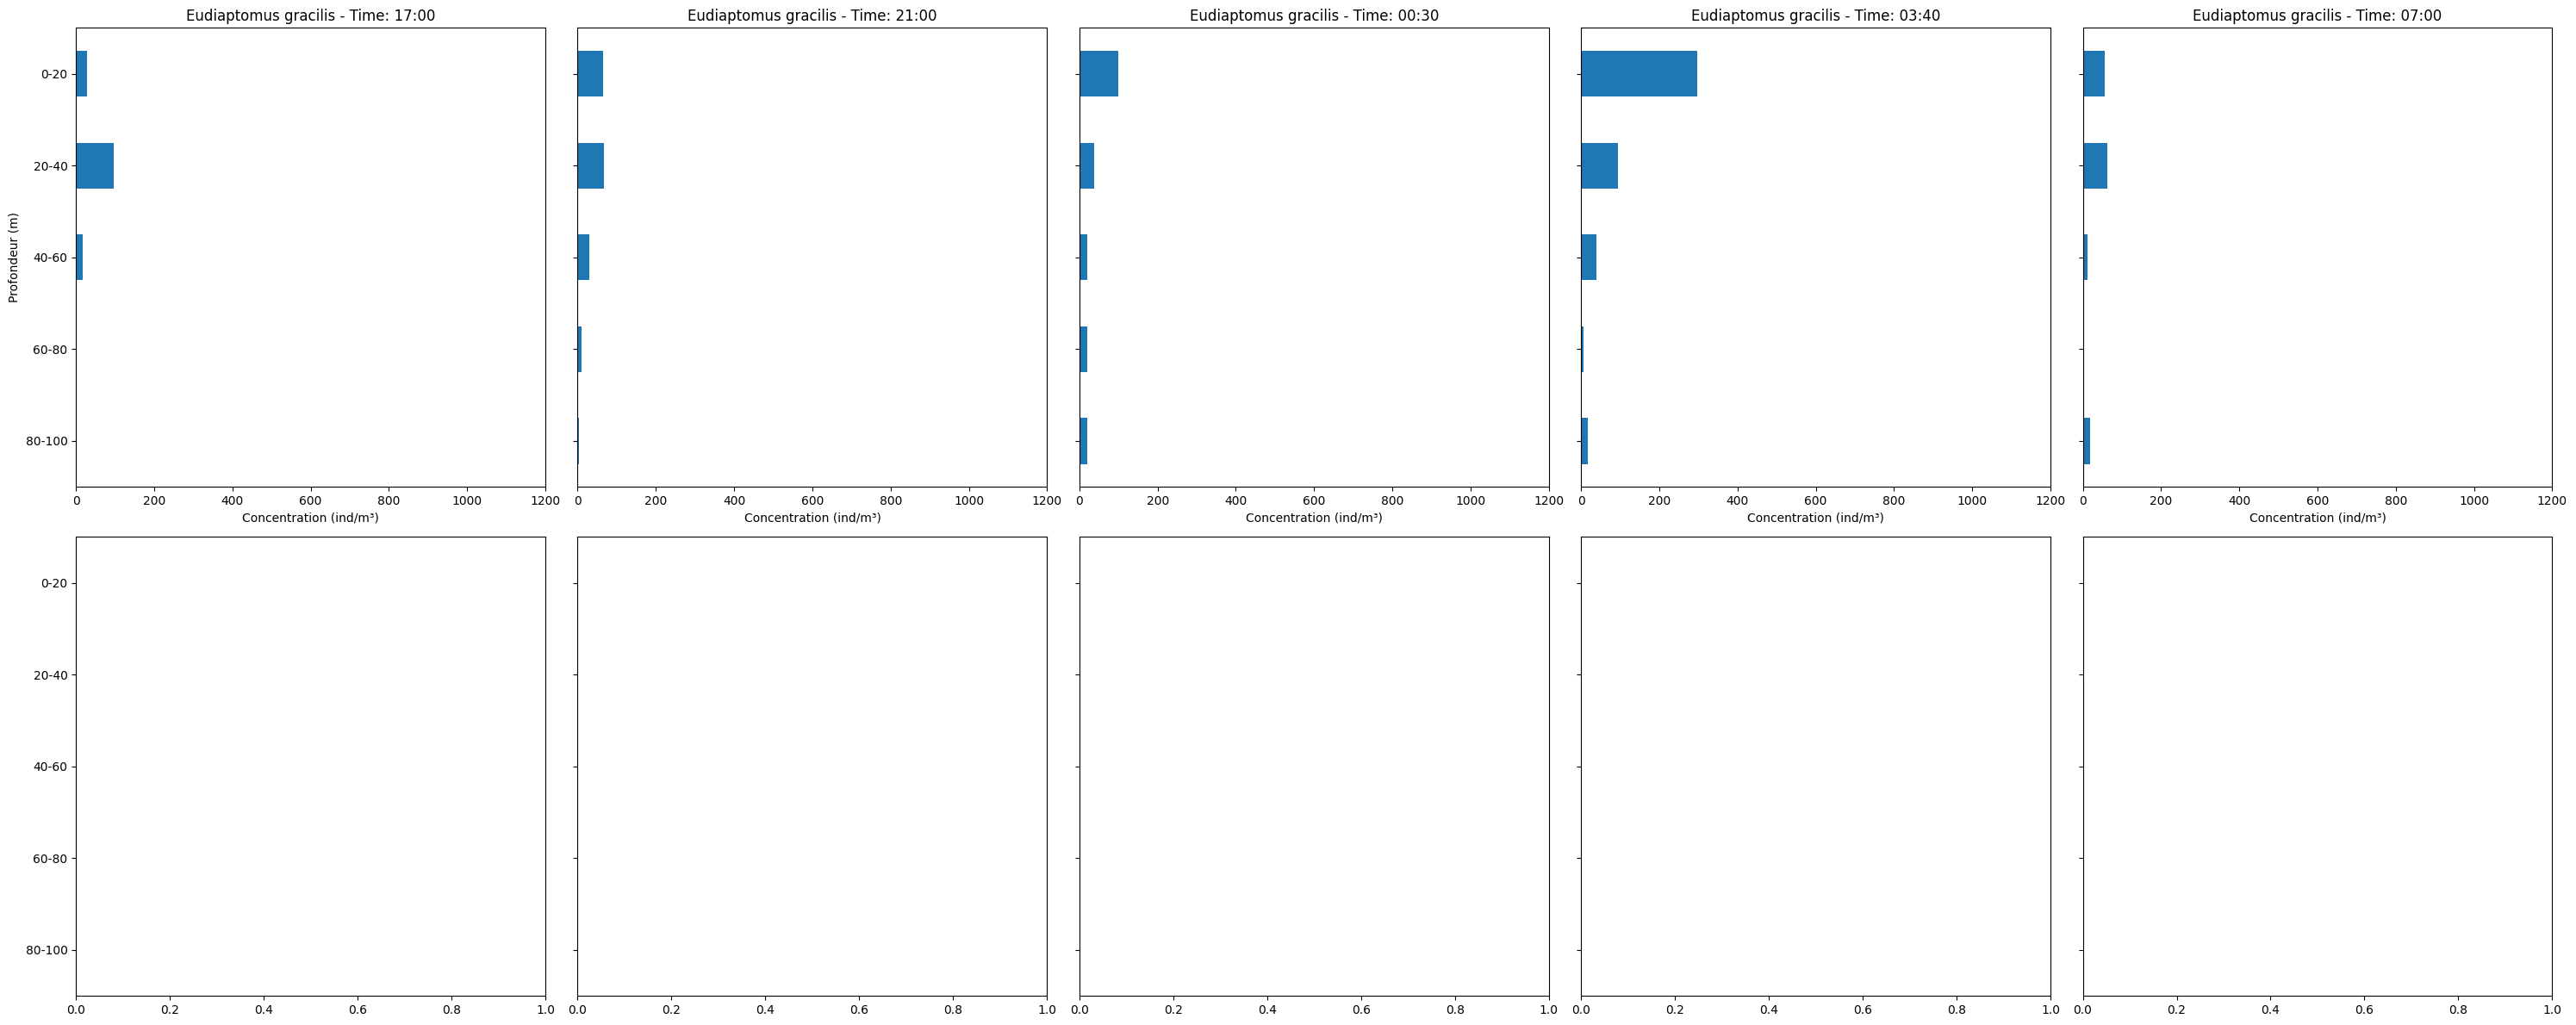

In [19]:
# Filtrez les données pour ne garder que l'espèce Cyclops prealpinus
species = 'Eudiaptomus gracilis'
filtered_profiles = [profile[profile['Taxa'] == species] for profile in profiles]

def calculate_concentration(profile):
    profile = profile.copy()  # Créer une copie pour éviter l'avertissement
    profile['Avg_depth'] = (profile['Min_depth'] + profile['Max_depth']) / 2
    profile['Depth_group'] = pd.cut(profile['Avg_depth'], bins=np.arange(0, 120, 20), right=False)
    concentration = profile.groupby('Depth_group').size() / profile['Tow_Vol'].iloc[0]
    return concentration

concentrations = [calculate_concentration(profile) for profile in filtered_profiles]

# Créez des bar plots horizontaux pour afficher ces concentrations en fonction de la profondeur
fig, axes = plt.subplots(2, 5, figsize=(30, 12), sharey=True)
axes = axes.flatten()

for idx, (hour, concentration) in enumerate(zip(hours, concentrations)):
    ax = axes[idx]
    concentration.plot(kind='barh', ax=ax)
    ax.set_title(f'{species} - Time: {hour}')
    ax.set_yticklabels([f"{intvl.left}-{intvl.right}" for intvl in concentration.index])
    ax.set_ylabel('Profondeur (m)')
    ax.set_xlabel('Concentration (ind/m³)')
    ax.set_ylim(-0.5, 4.5)
    ax.set_xlim(0, 1200)  # Fixer les limites de l'axe des x de 0 à 1200
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

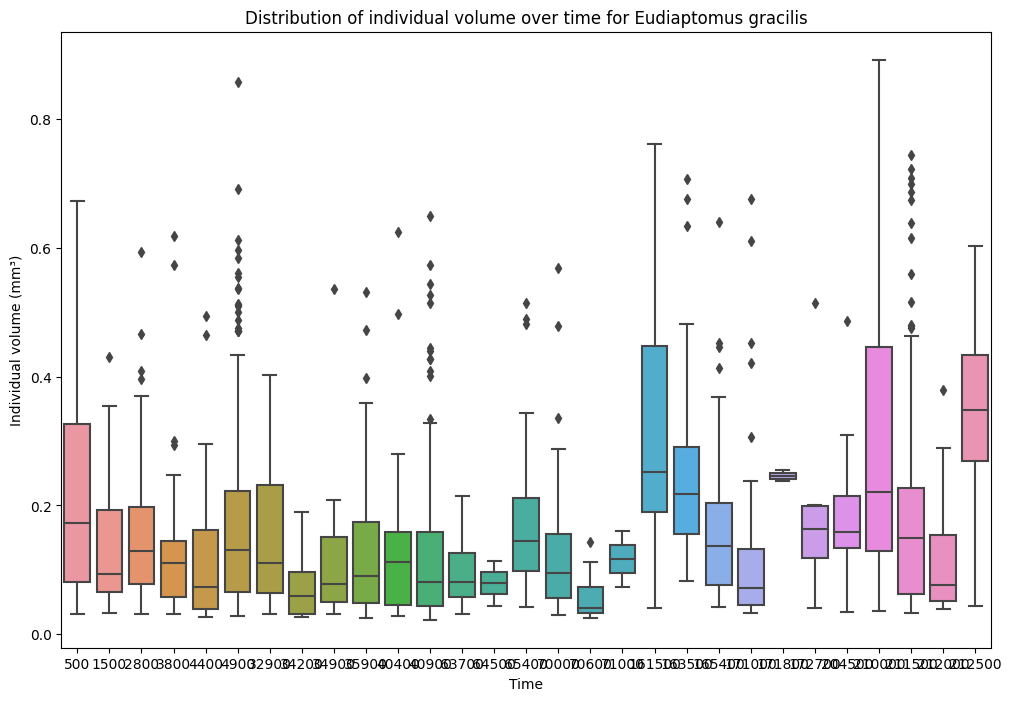

In [25]:
# Filtrez les données pour ne garder que l'espèce Eudiaptomus gracilis
all_profiles = pd.concat([profile_1, profile_2, profile_3, profile_4, profile_5], ignore_index=True)

sp = 'Cyclops prealpinus'
species_data = all_profiles[all_profiles['Taxa'] == sp]

# Créez un diagramme de boîte pour le volume du corps à différentes heures
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='Hour', y='V_mm3', data=species_data, ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Individual volume (mm³)')
ax.set_title('Distribution of individual volume over time for Eudiaptomus gracilis')

plt.show()


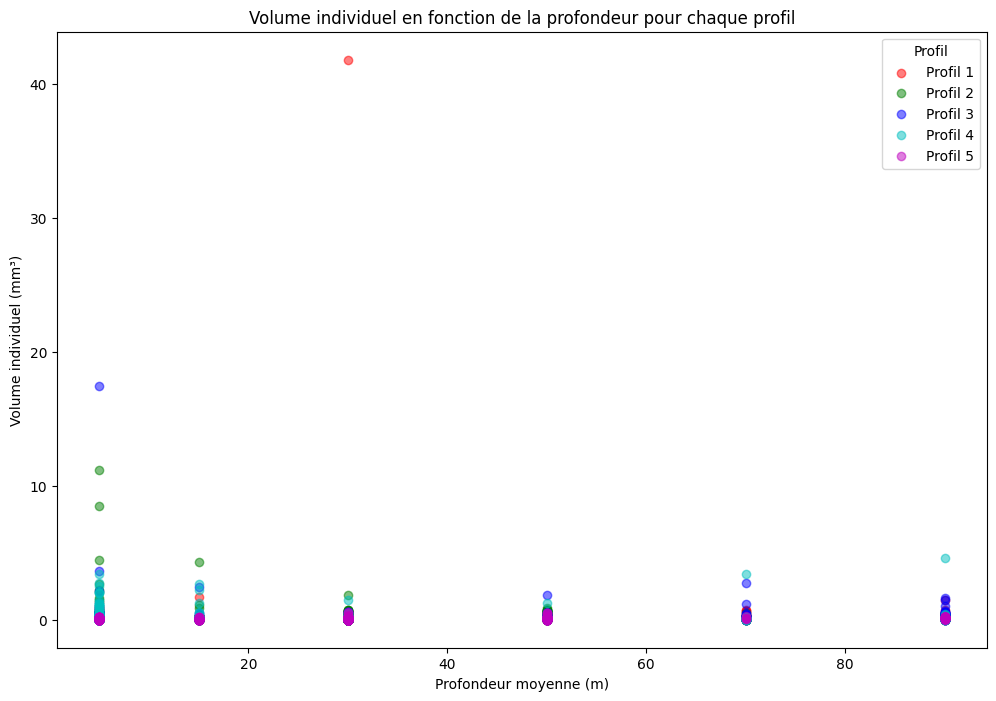

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

# Boucle sur chaque profil
for profile, color in zip(profiles, ["r", "g", "b", "c", "m"]): # Assurez-vous d'avoir autant de couleurs que de profils
    plt.scatter(profile['Avg_depth'], profile['V_mm3'], color=color, alpha=0.5)

ax.set_xlabel('Profondeur moyenne (m)')
ax.set_ylabel('Volume individuel (mm³)')
ax.set_title('Volume individuel en fonction de la profondeur pour chaque profil')
plt.legend(['Profil 1', 'Profil 2', 'Profil 3', 'Profil 4', 'Profil 5'], title='Profil') # Assurez-vous que l'ordre des légendes correspond à celui des profils
plt.show()

<ipython-input-27-e40ceda35cf8>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


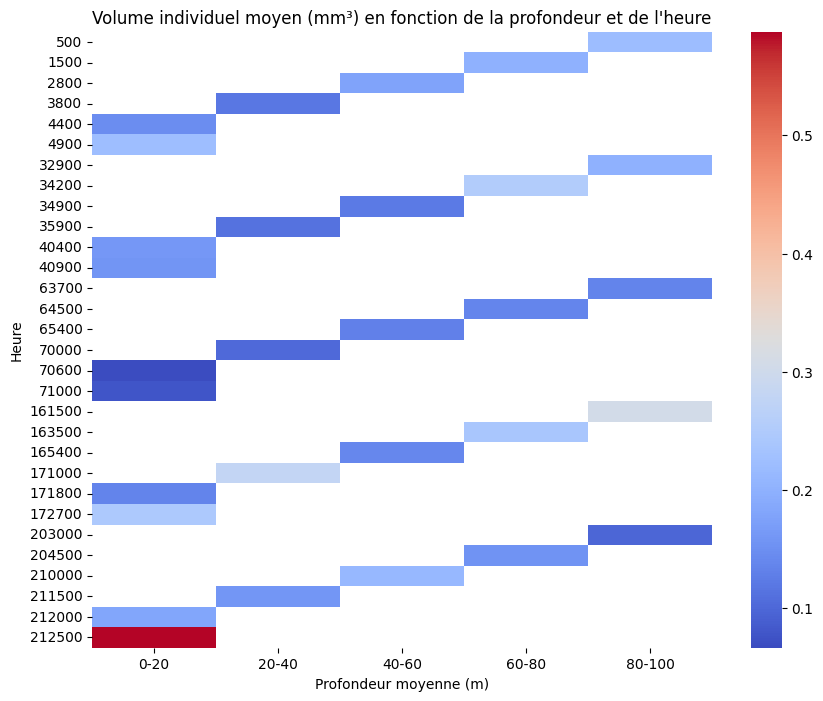

In [27]:
# Créez des tranches de profondeur
bins = np.arange(0, 120, 20)
labels = [f"{i}-{i + 20}" for i in range(0, 100, 20)]
all_profiles['Depth_group'] = pd.cut(all_profiles['Avg_depth'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calculez la moyenne du volume individuel pour chaque combinaison d'heure et de profondeur
grouped_data = all_profiles.groupby(['Hour', 'Depth_group'])['V_mm3'].mean().reset_index()

# Réorganisez les données en un format approprié pour la heatmap
heatmap_data = grouped_data.pivot('Hour', 'Depth_group', 'V_mm3')

# Créez la heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', ax=ax)

ax.set_xlabel('Profondeur moyenne (m)')
ax.set_ylabel('Heure')
ax.set_title('Volume individuel moyen (mm³) en fonction de la profondeur et de l\'heure')
plt.show()


<ipython-input-29-456a557cda87>:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


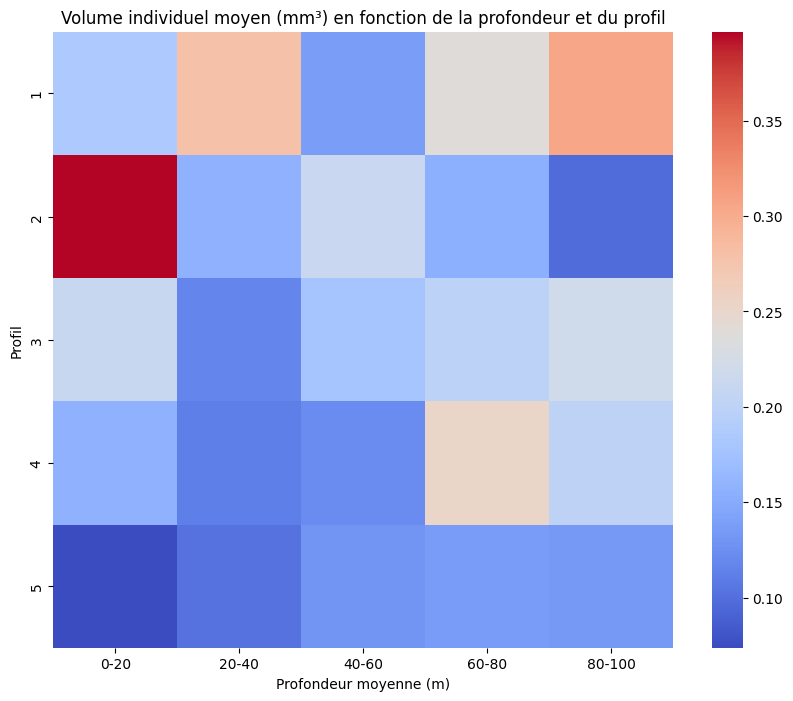

In [29]:
# Créez des tranches de profondeur

# Ajoutez une colonne 'Profile' à chaque profil
for idx, profile in enumerate(profiles, start=1):
    profile['Profile'] = idx

# Concaténez tous les profils en un seul DataFrame
all_profiles = pd.concat(profiles, ignore_index=True)
bins = np.arange(0, 120, 20)
labels = [f"{i}-{i + 20}" for i in range(0, 100, 20)]
all_profiles['Depth_group'] = pd.cut(all_profiles['Avg_depth'], bins=bins, labels=labels, right=False, include_lowest=True)

# Calculez la moyenne du volume individuel pour chaque combinaison de profil et de profondeur
grouped_data = all_profiles.groupby(['Profile', 'Depth_group'])['V_mm3'].mean().reset_index()

# Réorganisez les données en un format approprié pour la heatmap
heatmap_data = grouped_data.pivot('Profile', 'Depth_group', 'V_mm3')

# Créez la heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', ax=ax)

ax.set_xlabel('Profondeur moyenne (m)')
ax.set_ylabel('Profil')
ax.set_title('Volume individuel moyen (mm³) en fonction de la profondeur et du profil')
plt.show()


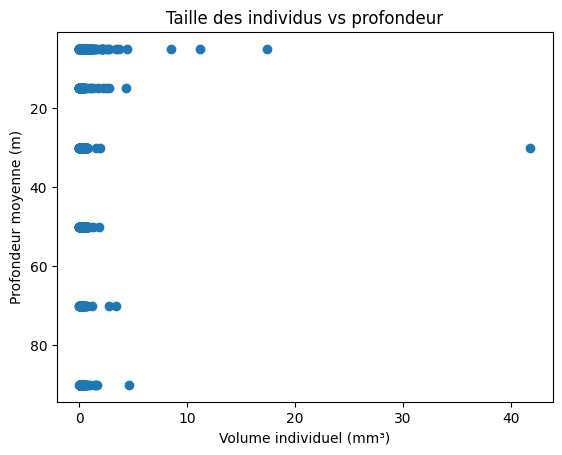

In [ ]:
# Concaténez les DataFrames de tous les profils
all_profiles_data = pd.concat(profiles, ignore_index=True)

# Calculez la profondeur moyenne pour chaque ligne
all_profiles_data['Avg_depth'] = (all_profiles_data['Min_depth'] + all_profiles_data['Max_depth']) / 2

# Tracez le nuage de points
plt.scatter(all_profiles_data['V_mm3'], all_profiles_data['Avg_depth'])
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title('Taille des individus vs profondeur')
plt.gca().invert_yaxis()
plt.show()

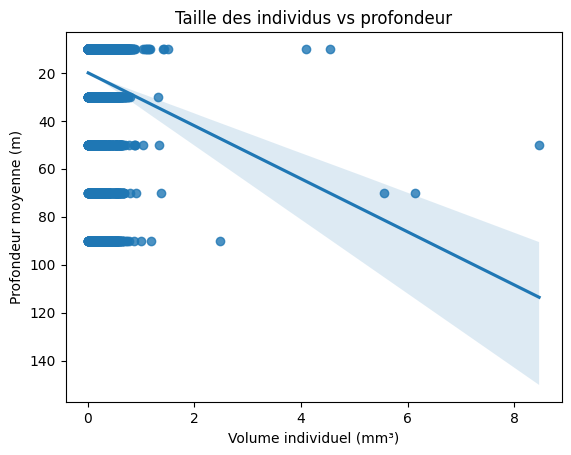

In [ ]:
sns.regplot(x='V_mm3', y='Avg_depth', data=all_profiles_data)
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title('Taille des individus vs profondeur')
plt.gca().invert_yaxis()
plt.show()

In [21]:
import seaborn as sns

# Filtrez les données pour ne garder que les Cyclops prealpinus
species = 'Cyclops prealpinus'
filtered_data = all_profiles_data[all_profiles_data['Taxa'] == species]

# Utilisez sns.regplot pour tracer la régression linéaire
sns.regplot(x='V_mm3', y='Avg_depth', data=filtered_data)
plt.xlabel('Volume individuel (mm³)')
plt.ylabel('Profondeur moyenne (m)')
plt.title(f'Taille des individus vs profondeur ({species})')
plt.gca().invert_yaxis()
plt.show()

NameError: ignored

In [ ]:
from scipy.stats import pearsonr

species = 'Cyclops prealpinus'
filtered_data = all_profiles_data[all_profiles_data['Taxa'] == species]

correlation, p_value = pearsonr(filtered_data['V_mm3'], filtered_data['Avg_depth'])
print(f"Corrélation de Pearson: {correlation:.2f}, p-value: {p_value:.5f}")

Corrélation de Pearson: 0.07, p-value: 0.00000


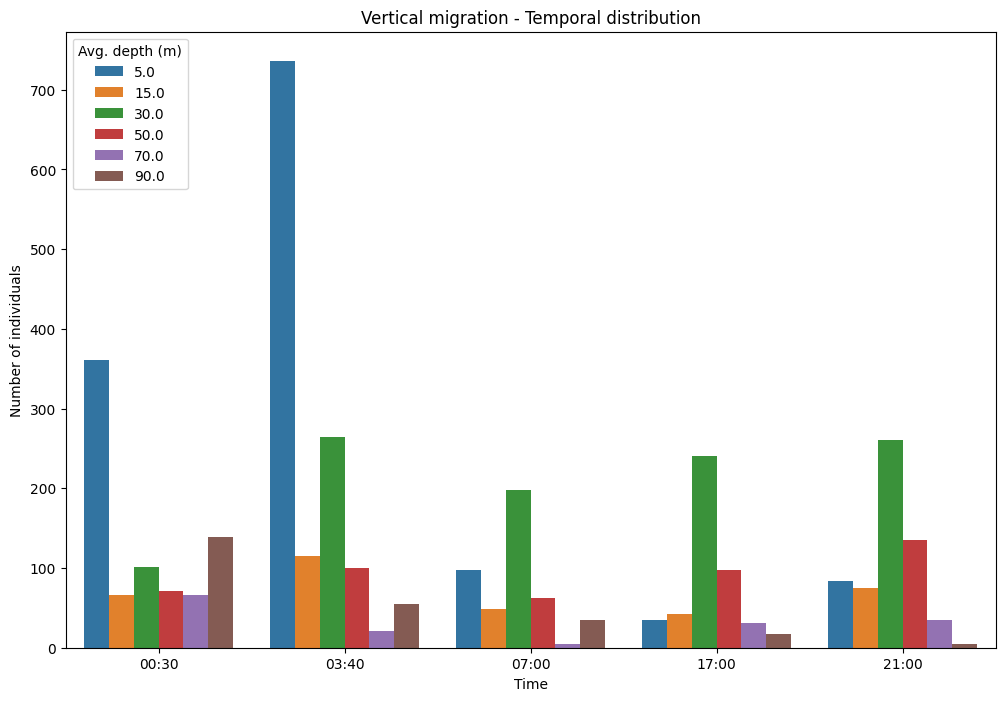

In [ ]:
# Ajoutez une colonne 'Profile' à chaque profil
for idx, profile in enumerate(profiles, start=1):
    profile['Profile'] = idx

# Concaténez tous les profils en un seul DataFrame
all_profiles = pd.concat(profiles, ignore_index=True)

# Créez une colonne 'Hour' pour stocker l'heure associée à chaque profil
all_profiles['Hour'] = all_profiles['Profile'].map(dict(zip(range(1, len(hours) + 1), hours)))

# Groupez les données par heure et profondeur moyenne, puis calculez le nombre d'individus pour chaque groupe
grouped_data = all_profiles.groupby(['Hour', 'Avg_depth']).size().reset_index(name='Count')

# Créez un graphique à barres empilées pour visualiser la distribution des individus en fonction de la profondeur et du temps
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', hue='Avg_depth', data=grouped_data, ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_title('Vertical migration - Temporal distribution')
plt.legend(title='Avg. depth (m)', loc='upper left')
plt.show()


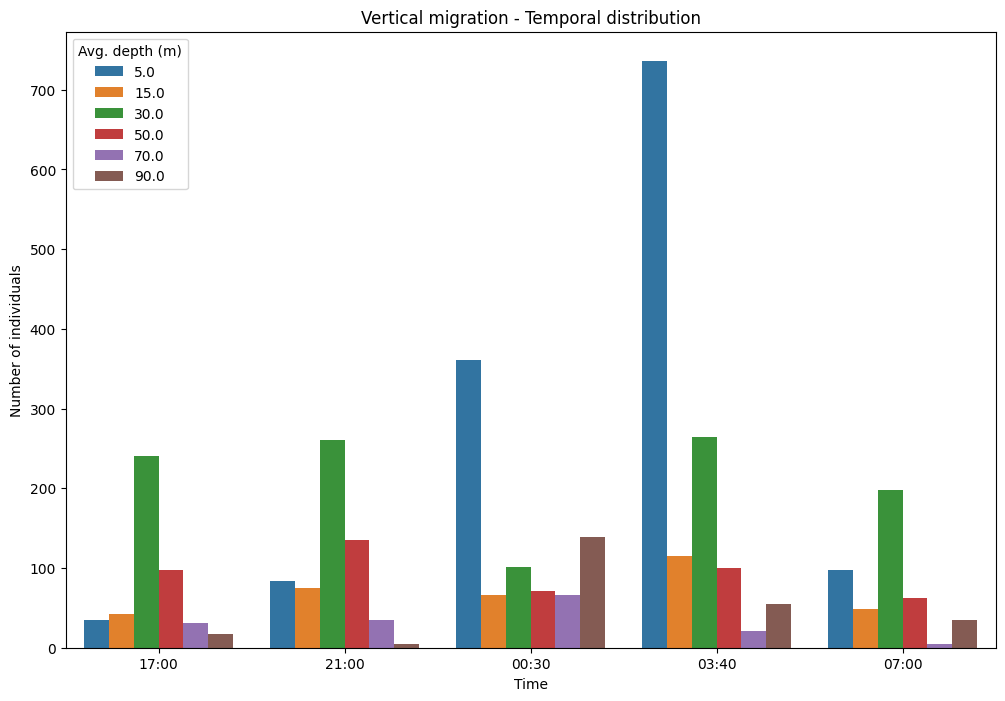

In [ ]:

# Ajoutez une colonne 'Profile' à chaque profil
for idx, profile in enumerate(profiles, start=1):
    profile['Profile'] = idx

# Concaténez tous les profils en un seul DataFrame
all_profiles = pd.concat(profiles, ignore_index=True)

# Créez une colonne 'Hour' pour stocker l'heure associée à chaque profil
all_profiles['Hour'] = all_profiles['Profile'].map(dict(zip(range(1, len(hours) + 1), hours)))

# Conversion en string
hours = [str(x) for x in hours]

# Ordre spécifique
order = ['17:00', '21:00', '00:30', '03:40', '07:00']

# Convertir en variable catégorielle
all_profiles['Hour'] = pd.Categorical(all_profiles['Hour'], categories=order, ordered=True)

# Groupez les données par heure et profondeur moyenne, puis calculez le nombre d'individus pour chaque groupe
grouped_data = all_profiles.groupby(['Hour', 'Avg_depth']).size().reset_index(name='Count')

# Créez un graphique à barres empilées pour visualiser la distribution des individus en fonction de la profondeur et du temps
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Hour', y='Count', hue='Avg_depth', data=grouped_data, ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_title('Vertical migration - Temporal distribution')
plt.legend(title='Avg. depth (m)', loc='upper left')
plt.show()


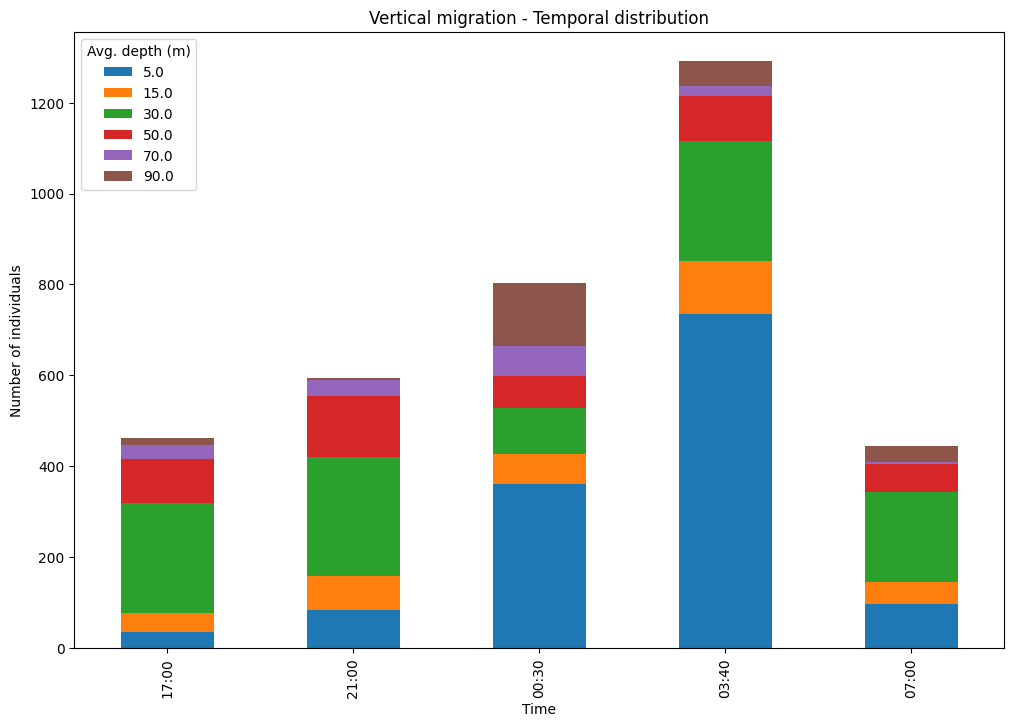

In [ ]:
# Ajoutez une colonne 'Profile' à chaque profil
for idx, profile in enumerate(profiles, start=1):
    profile['Profile'] = idx

# Concaténez tous les profils en un seul DataFrame
all_profiles = pd.concat(profiles, ignore_index=True)

# Créez une colonne 'Hour' pour stocker l'heure associée à chaque profil
all_profiles['Hour'] = all_profiles['Profile'].map(dict(zip(range(1, len(hours) + 1), hours)))

# Conversion en string
hours = [str(x) for x in hours]

# Ordre spécifique
order = ['17:00', '21:00', '00:30', '03:40', '07:00']

# Convertir en variable catégorielle
all_profiles['Hour'] = pd.Categorical(all_profiles['Hour'], categories=order, ordered=True)

# Groupez les données par heure et profondeur moyenne, puis calculez le nombre d'individus pour chaque groupe
grouped_data = all_profiles.groupby(['Hour', 'Avg_depth']).size().reset_index(name='Count')

# Pivoter les données pour avoir chaque Avg_depth comme une colonne séparée
pivot_data = grouped_data.pivot(index='Hour', columns='Avg_depth', values='Count').fillna(0)

# Créez un graphique à barres empilées pour visualiser la distribution des individus en fonction de la profondeur et du temps
fig, ax = plt.subplots(figsize=(12, 8))
pivot_data.plot.bar(stacked=True, ax=ax)

ax.set_xlabel('Time')
ax.set_ylabel('Number of individuals')
ax.set_title('Vertical migration - Temporal distribution')
plt.legend(title='Avg. depth (m)', loc='upper left')
plt.show()
